In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import set_random_seed
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split as split_data
from tensorflow.keras.utils import plot_model
import os

Размер обучающего набора: 50000
Размер тестового набора: 10000


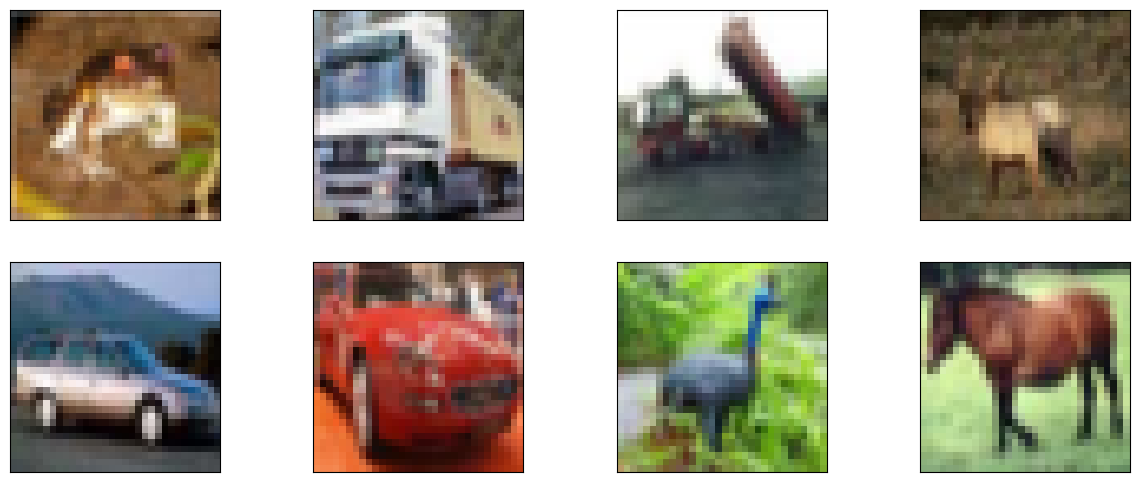

In [16]:
# Установка начального состояния для воспроизводимости результатов
set_random_seed(21)

# Загрузка набора данных CIFAR-10
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

print(f"Размер обучающего набора: {len(train_images)}\nРазмер тестового набора: {len(test_images)}")

def plot_images(images, rows=2, cols=4, figsize=(15,6)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i])
            ax.set_xticks([]) 
            ax.set_yticks([]) 
        else:
            ax.axis('off') 
    plt.show()

random_images = [train_images[i] for i in range(8)]

plot_images(random_images)

In [17]:
# Загрузка и разделение набора данных CIFAR-10
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Дополнительное разделение тестового набора на тестовый и валидационный наборы
validation_images, final_test_images, validation_labels, final_test_labels = split_data(test_images, test_labels, test_size=0.2, random_state=21)

print(f"Размер тестового набора: {len(final_test_images)}, Размер валидационного набора: {len(validation_images)}")

# Нормализация пиксельных значений изображений
train_images_normalized = train_images / 255.0
final_test_images_normalized = final_test_images / 255.0
validation_images_normalized = validation_images / 255.0

# Кодирование меток в формате one-hot
train_labels_one_hot = keras.utils.to_categorical(train_labels, 10)
final_test_labels_one_hot = keras.utils.to_categorical(final_test_labels, 10)
validation_labels_one_hot = keras.utils.to_categorical(validation_labels, 10)

# Подготовка наборов данных для обучения, валидации и тестирования
train_dataset = tf.data.Dataset.from_tensor_slices((train_images_normalized, train_labels_one_hot))
validation_dataset = tf.data.Dataset.from_tensor_slices((validation_images_normalized, validation_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((final_test_images_normalized, final_test_labels_one_hot))

# Настройка параметров аугментации данных для наборов данных
batch_size = 256
shuffle_buffer_size = 500

train_dataset_prepared = train_dataset.shuffle(shuffle_buffer_size).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset_prepared = validation_dataset.shuffle(shuffle_buffer_size).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset_prepared = test_dataset.shuffle(shuffle_buffer_size).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)


Размер тестового набора: 2000, Размер валидационного набора: 8000


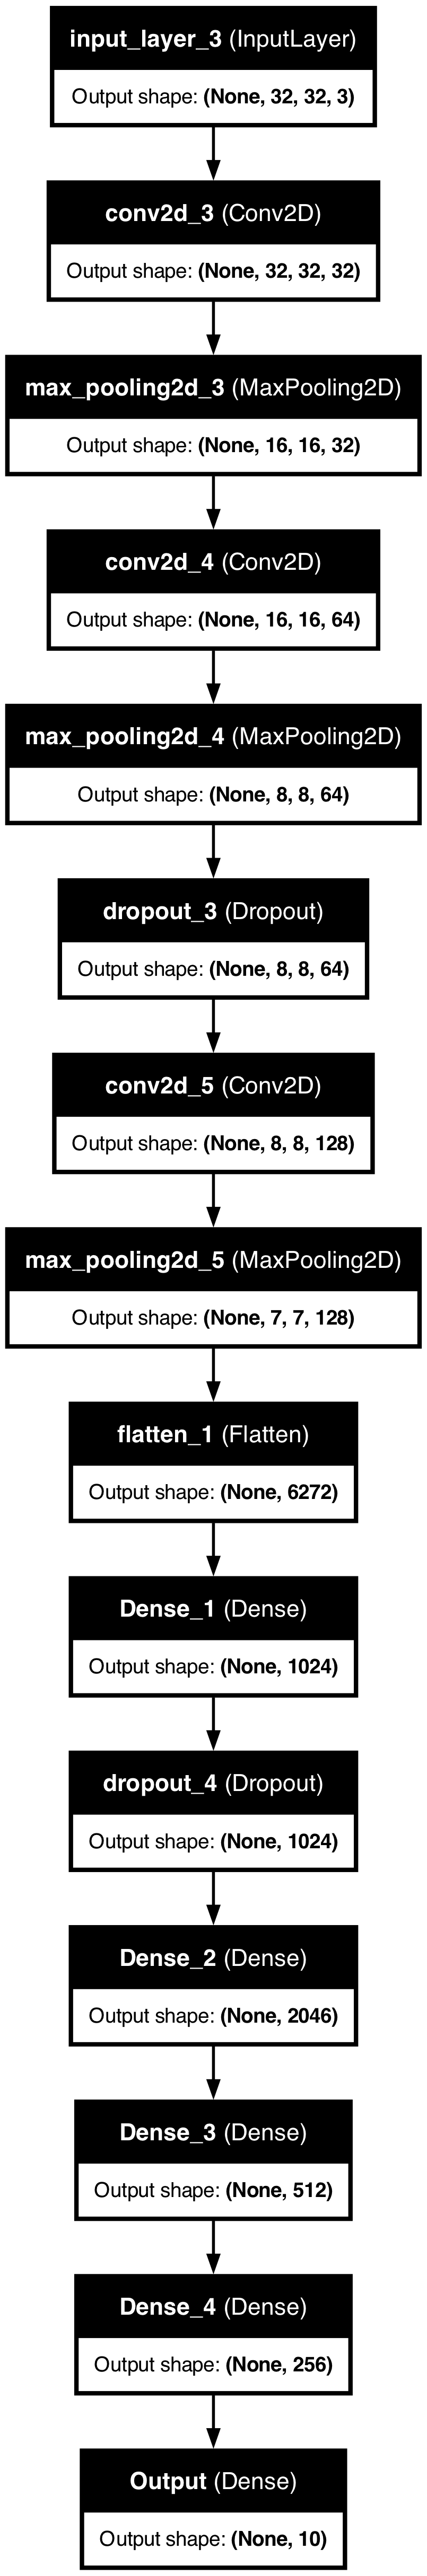

In [19]:
inputs = keras.Input(shape = (32,32,3))
x = keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2), strides=2)(x)
x = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2), strides=2)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Conv2D(128, (2, 2), padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2), strides=1)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1024, activation="relu", name='Dense_1')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(2046, activation='relu', name='Dense_2')(x)
x = keras.layers.Dense(512, activation='relu', name='Dense_3')(x)
x = keras.layers.Dense(256, activation='relu', name='Dense_4')(x)
output = keras.layers.Dense(10, activation='softmax', name='Output')(x)

model = keras.models.Model(inputs=inputs, outputs=output)

# Визуализация архитектуры модели
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [23]:
model.compile(keras.optimizers.Adam(0.0005), loss="categorical_crossentropy",
              metrics=[keras.metrics.F1Score(average = 'weighted'), keras.metrics.Precision(), keras.metrics.Recall()],)

history = model.fit(dataset_train, validation_data=dataset_valid, 
                    epochs=20, callbacks=tf.keras.callbacks.TensorBoard(log_dir='Exp1_logs'))

eval_hist = model.evaluate(dataset_test)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 91s 437ms/step - f1_score: 0.2378 - loss: 1.9770 - precision_3: 0.4647 - recall_3: 0.0413 - val_f1_score: 0.4388 - val_loss: 1.5038 - val_precision_3: 0.6990 - val_recall_3: 0.1695
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 421ms/step - f1_score: 0.4879 - loss: 1.3792 - precision_3: 0.6840 - recall_3: 0.2791 - val_f1_score: 0.5741 - val_loss: 1.2072 - val_precision_3: 0.7895 - val_recall_3: 0.3408
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 77s 391ms/step - f1_score: 0.5644 - loss: 1.1933 - precision_3: 0.7250 - recall_3: 0.3969 - val_f1_score: 0.6104 - val_loss: 1.1104 - val_precision_3: 0.7452 - val_recall_3: 0.4493
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 74s 379ms/step - f1_score: 0.6126 - loss: 1.0677 - precision_3: 0.7516 - recall_3: 0.4763 - val_f1_score: 0.6580 - val_loss: 0.9588 - val_precision_3: 0.7859 - val_recall_3: 0.5429
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 418ms/step - f1_score: 0.6606 - loss: 0.9460 - precision_3: 0.7763 - rec

In [24]:
print(
    f"Eval_loss = {eval_hist[0]:.4f} \n"
    f"Eval_f1 = {eval_hist[1]:.4f} \n"
    f"Eval_precision = {eval_hist[2]:.4f} \n"
    f"Eval_recall = {eval_hist[3]:.4f}"
)

Eval_loss = 0.7081 
Eval_f1 = 0.7945 
Eval_precision = 0.8193 
Eval_recall = 0.7775


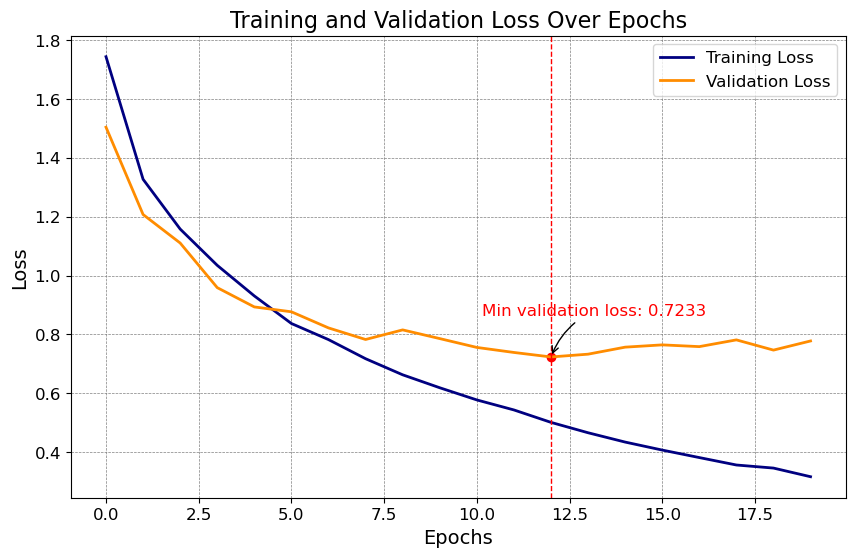

In [28]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Training Loss', color='navy', linewidth=2)
plt.plot(history_df['val_loss'], label='Validation Loss', color='darkorange', linewidth=2)
plt.title('Training and Validation Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.legend(fontsize=12)

min_val_loss_idx = history_df['val_loss'].idxmin() # индекс минимального значения валидационной потери
min_val_loss = history_df['val_loss'].min()
plt.axvline(x=min_val_loss_idx, linestyle='--', color='red', linewidth=1, label='Lowest validation loss')
plt.scatter(min_val_loss_idx, min_val_loss, color='red') 

plt.annotate(f'Min validation loss: {min_val_loss:.4f}',
             xy=(min_val_loss_idx, min_val_loss),
             xycoords='data',
             xytext=(-50, 30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
             fontsize=12,
             color='red')

plt.show()

Index(['f1_score', 'loss', 'precision_3', 'recall_3', 'val_f1_score',
       'val_loss', 'val_precision_3', 'val_recall_3'],
      dtype='object')


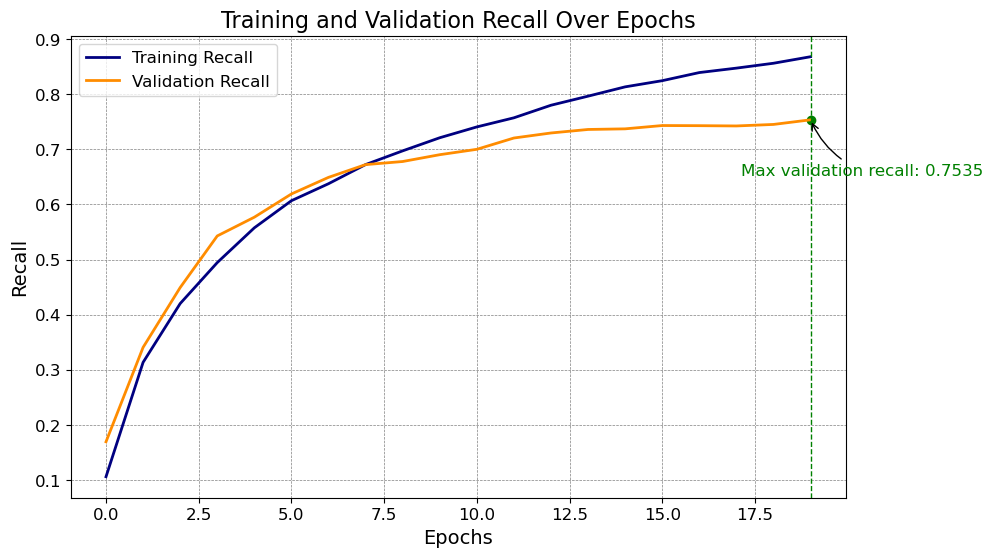

In [35]:
print(history_df.keys())

plt.figure(figsize=(10, 6))

plt.plot(history_df['recall_3'], label='Training Recall', color='navy', linewidth=2)
plt.plot(history_df['val_recall_3'], label='Validation Recall', color='darkorange', linewidth=2)
plt.title('Training and Validation Recall Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.legend(fontsize=12)

max_val_recall_idx = history_df['val_recall_3'].idxmax() # индекс максимального значения валидационного recall
max_val_recall = history_df['val_recall_3'].max()
plt.axvline(x=max_val_recall_idx, linestyle='--', color='green', linewidth=1, label='Highest validation recall')
plt.scatter(max_val_recall_idx, max_val_recall, color='green')

plt.annotate(f'Max validation recall: {max_val_recall:.4f}',
             xy=(max_val_recall_idx, max_val_recall),
             xycoords='data',
             xytext=(-50, -40),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"),
             fontsize=12,
             color='green')

plt.show()

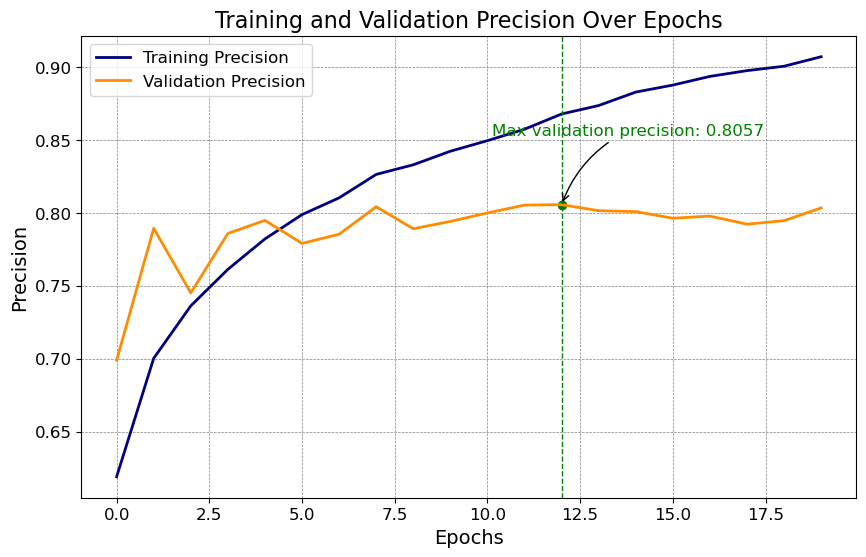

In [38]:
plt.figure(figsize=(10, 6))

plt.plot(history_df['precision_3'], label='Training Precision', color='navy', linewidth=2)
plt.plot(history_df['val_precision_3'], label='Validation Precision', color='darkorange', linewidth=2)
plt.title('Training and Validation Precision Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.legend(fontsize=12)

max_val_precision_idx = history_df['val_precision_3'].idxmax()
max_val_precision = history_df['val_precision_3'].max()
plt.axvline(x=max_val_precision_idx, linestyle='--', color='green', linewidth=1, label='Highest validation precision')
plt.scatter(max_val_precision_idx, max_val_precision, color='green')

plt.annotate(f'Max validation precision: {max_val_precision:.4f}',
             xy=(max_val_precision_idx, max_val_precision),
             xycoords='data',
             xytext=(-50, 50),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
             fontsize=12,
             color='green')

plt.show()


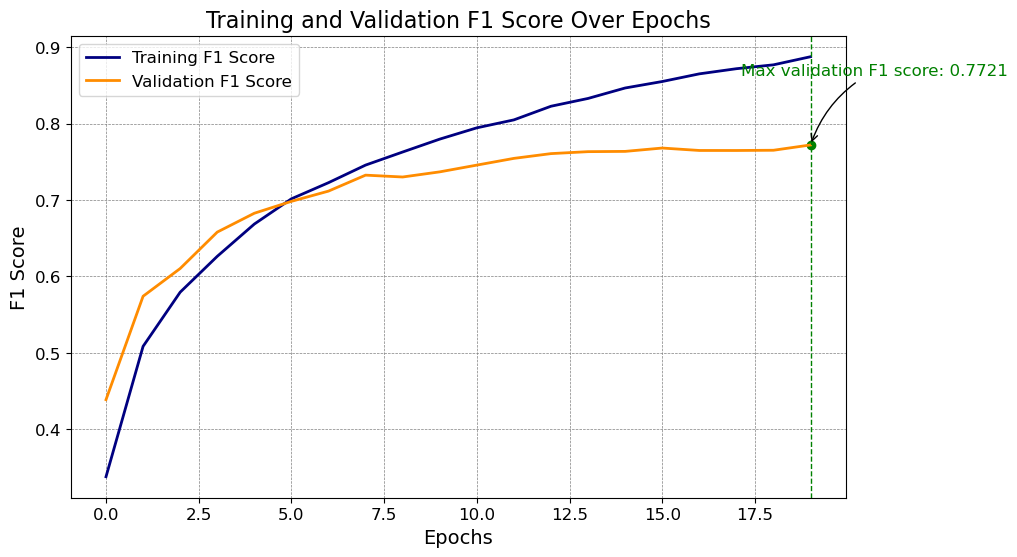

In [39]:
plt.figure(figsize=(10, 6))

plt.plot(history_df['f1_score'], label='Training F1 Score', color='navy', linewidth=2)
plt.plot(history_df['val_f1_score'], label='Validation F1 Score', color='darkorange', linewidth=2)
plt.title('Training and Validation F1 Score Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.legend(fontsize=12)

max_val_f1_score_idx = history_df['val_f1_score'].idxmax()
max_val_f1_score = history_df['val_f1_score'].max()
plt.axvline(x=max_val_f1_score_idx, linestyle='--', color='green', linewidth=1, label='Highest validation F1 score')
plt.scatter(max_val_f1_score_idx, max_val_f1_score, color='green')
plt.annotate(f'Max validation F1 score: {max_val_f1_score:.4f}',
             xy=(max_val_f1_score_idx, max_val_f1_score),
             xycoords='data',
             xytext=(-50, 50), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
             fontsize=12,
             color='green')

plt.show()

In [41]:
preds = model.predict(X_valid)

preds_converted = np.argmax(preds, axis=1)
y_valid_converted = np.argmax(y_valid, axis=1)

print(classification_report(y_valid_converted, preds_converted))

250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       792
           1       0.85      0.90      0.87       811
           2       0.68      0.73      0.70       801
           3       0.64      0.52      0.57       792
           4       0.72      0.75      0.73       804
           5       0.67      0.68      0.68       798
           6       0.80      0.86      0.83       786
           7       0.82      0.83      0.82       801
           8       0.85      0.88      0.87       806
           9       0.85      0.84      0.85       809

    accuracy                           0.77      8000
   macro avg       0.77      0.77      0.77      8000
weighted avg       0.77      0.77      0.77      8000



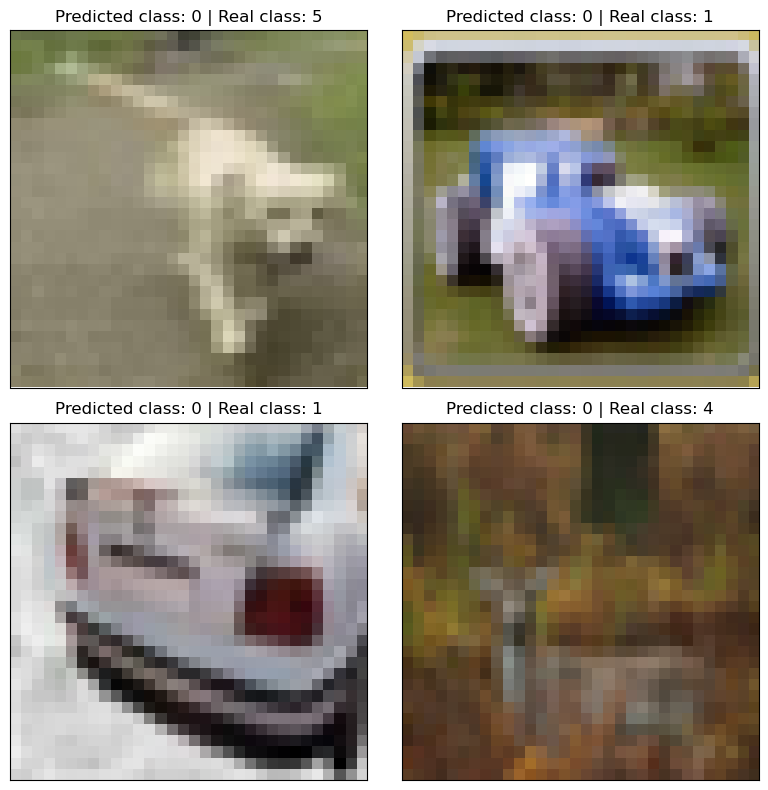

In [133]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Плоский список всех подграфиков для удобства итерации
axes_flat = axes.flatten()

for i, ax in enumerate(axes_flat):
    ax.imshow(validation_images_normalized[i])

    predicted_class = np.argmax(preds[i])
    real_class = y_valid_converted[i]
    
    ax.set_title(f'Predicted class: {predicted_class} | Real class: {real_class}')
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [49]:
import os

model_dir = 'Models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'model_1.keras')
model.save(model_path)

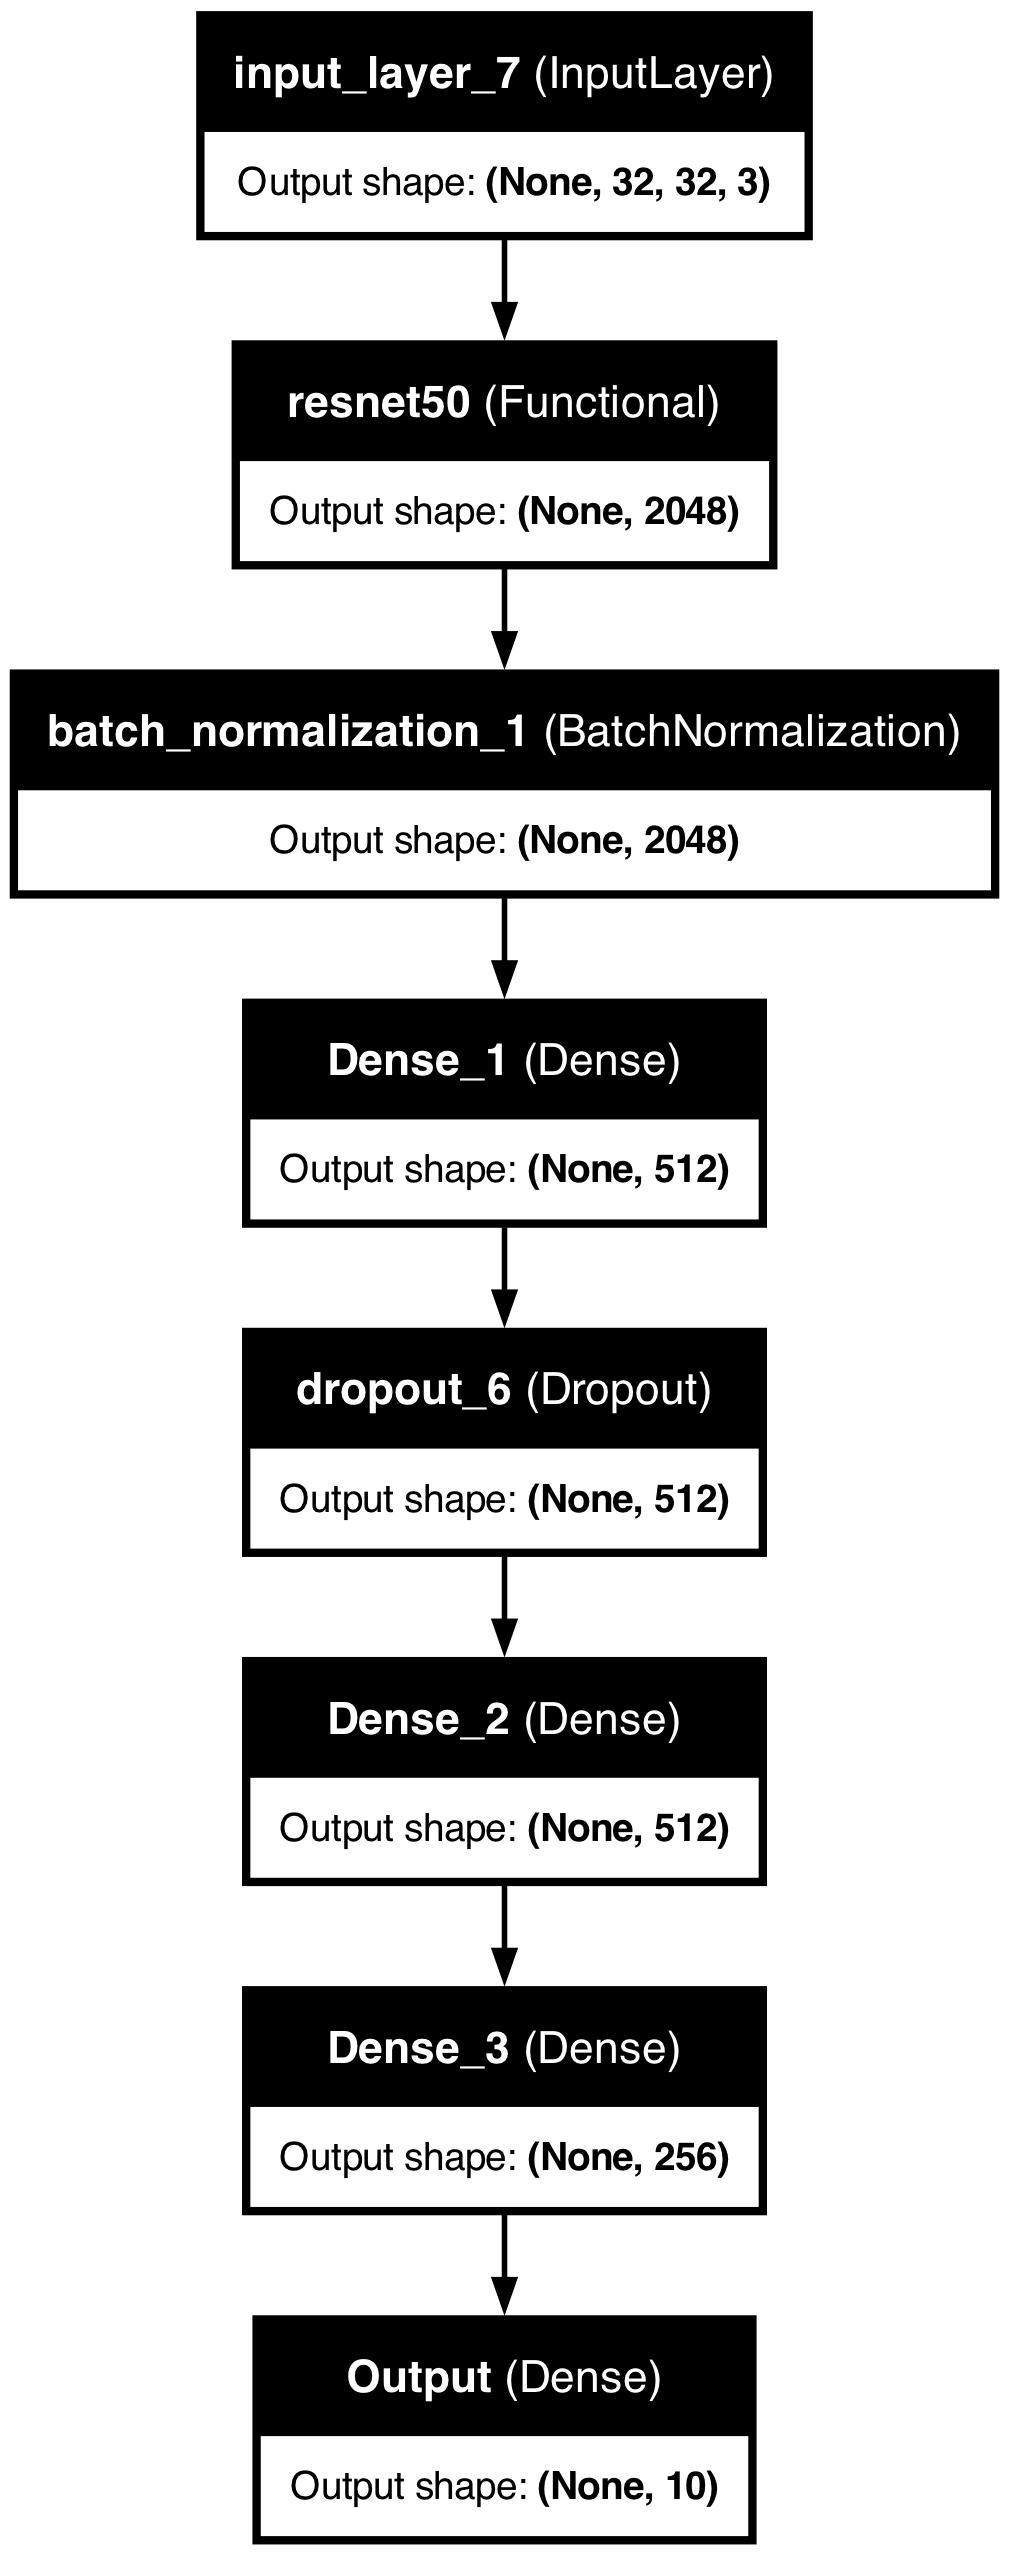

In [52]:
# Exp 2
# Предобученный бэкбон resnet50
from keras.utils import plot_model

base_resnet = keras.applications.resnet50.ResNet50(weights = 'imagenet', include_top=False, input_shape=(32,32,3), pooling = 'avg')

inputs = keras.Input(shape = (32,32,3))
x = base_resnet(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation="relu", name='Dense_1')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(512, activation='relu', name='Dense_2')(x)
x = keras.layers.Dense(256, activation='relu', name='Dense_3')(x)
output = keras.layers.Dense(10, activation='softmax', name='Output')(x)

model_2 = keras.models.Model(inputs = inputs, outputs = output)

plot_model(model_2, to_file='model_2_plot.png', show_shapes=True, show_layer_names=True)

In [54]:
model_2.compile(keras.optimizers.Adam(0.0005), loss="categorical_crossentropy",
              metrics=[keras.metrics.F1Score(average = 'weighted'), keras.metrics.Precision(), keras.metrics.Recall()])

tensorboard = tf.keras.callbacks.TensorBoard(log_dir="Exp2_logs")

history_2 = model_2.fit(dataset_train, validation_data=dataset_valid, 
                    epochs=10, callbacks=[learn_rate_red, early_stop, tensorboard])

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1388s 7s/step - f1_score: 0.5040 - loss: 1.4067 - precision_4: 0.7007 - recall_4: 0.3572 - val_f1_score: 0.0178 - val_loss: 3.0244 - val_precision_4: 1.0000 - val_recall_4: 1.2500e-04 - learning_rate: 5.0000e-04
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 621s 3s/step - f1_score: 0.7872 - loss: 0.6305 - precision_4: 0.8516 - recall_4: 0.7297 - val_f1_score: 0.0320 - val_loss: 3.2243 - val_precision_4: 0.2734 - val_recall_4: 0.0099 - learning_rate: 5.0000e-04
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - f1_score: 0.8554 - loss: 0.4337 - precision_4: 0.8932 - recall_4: 0.8213 - val_f1_score: 0.1010 - val_loss: 3.2303 - val_precision_4: 0.2059 - val_recall_4: 0.1084 - learning_rate: 5.0000e-04
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 595s 3s/step - f1_score: 0.8887 - loss: 0.3379 - precision_4: 0.9127 - recall_4: 0.8661 - val_f1_score: 0.4369 - val_loss: 2.1767 - val_precision_4: 0.4814 - val_recall_4: 0.4065 - learning_rate: 5.0000e-04
Epoch 5

In [57]:
eval_hist_2 = model_2.evaluate(dataset_test)

results_template = (
    "Eval_loss = {:.4f} \n"
    "Eval_f1 = {:.4f} \n"
    "Eval_precision = {:.4f} \n"
    "Eval_recall = {:.4f}"
)

print(results_template.format(eval_hist_2[0], 
                              eval_hist_2[1], 
                              eval_hist_2[2],
                              eval_hist_2[3]))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - f1_score: 0.7891 - loss: 0.8990 - precision_4: 0.8008 - recall_4: 0.7758
Eval_loss = 0.9061 
Eval_f1 = 0.7830 
Eval_precision = 0.7975 
Eval_recall = 0.7720


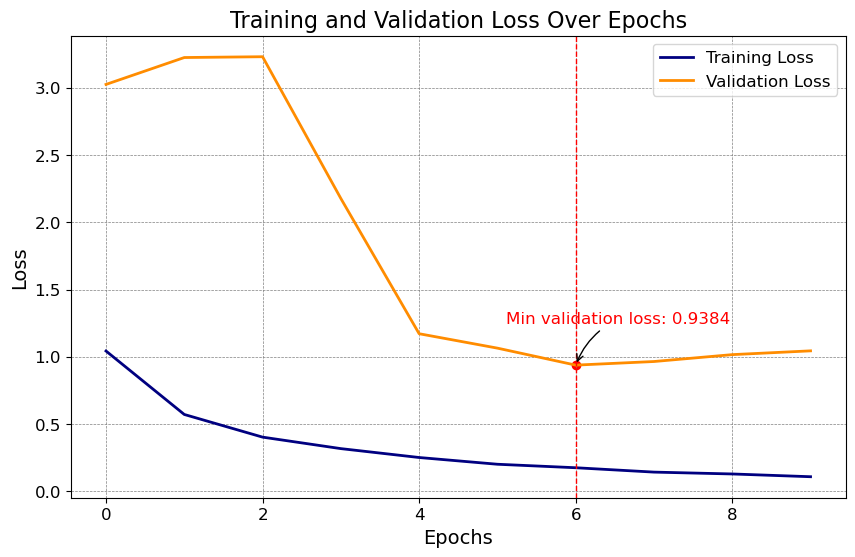

In [60]:
#График изменения функции потерь
history_df = pd.DataFrame(history_2.history)

plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Training Loss', color='navy', linewidth=2)
plt.plot(history_df['val_loss'], label='Validation Loss', color='darkorange', linewidth=2)
plt.title('Training and Validation Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.legend(fontsize=12)

min_val_loss_idx = history_df['val_loss'].idxmin()
min_val_loss = history_df['val_loss'].min()
plt.axvline(x=min_val_loss_idx, linestyle='--', color='red', linewidth=1, label='Lowest validation loss')
plt.scatter(min_val_loss_idx, min_val_loss, color='red')

plt.annotate(f'Min validation loss: {min_val_loss:.4f}',
             xy=(min_val_loss_idx, min_val_loss),
             xycoords='data',
             xytext=(-50, 30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
             fontsize=12,
             color='red')

plt.show()

In [61]:
print(history_df.columns)

Index(['f1_score', 'loss', 'precision_4', 'recall_4', 'val_f1_score',
       'val_loss', 'val_precision_4', 'val_recall_4', 'learning_rate'],
      dtype='object')


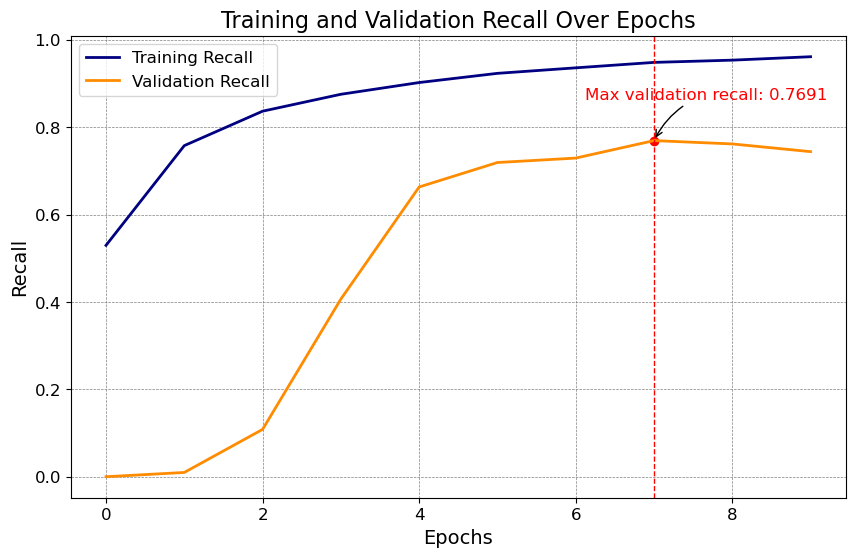

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(history_df['recall_4'], label='Training Recall', color='navy', linewidth=2)
plt.plot(history_df['val_recall_4'], label='Validation Recall', color='darkorange', linewidth=2)
plt.title('Training and Validation Recall Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.legend(fontsize=12)

max_val_recall_idx = history_df['val_recall_4'].idxmax() 
max_val_recall = history_df['val_recall_4'].max()
plt.axvline(x=max_val_recall_idx, linestyle='--', color='red', linewidth=1, label='Highest Validation Recall')
plt.scatter(max_val_recall_idx, max_val_recall, color='red') # Точка максимального значения Validation Recall

plt.annotate(f'Max validation recall: {max_val_recall:.4f}',
             xy=(max_val_recall_idx, max_val_recall),
             xycoords='data',
             xytext=(-50, 30), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
             fontsize=12,
             color='red')

plt.show()

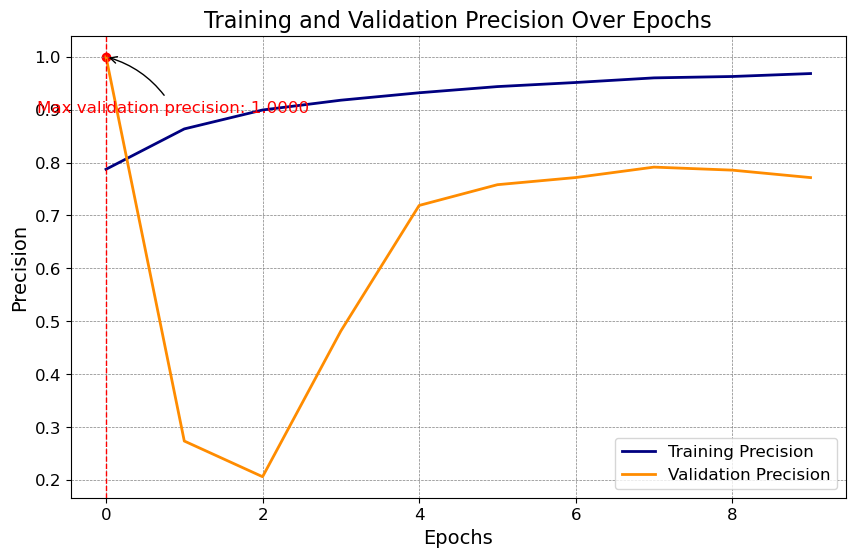

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(history_df['precision_4'], label='Training Precision', color='navy', linewidth=2)
plt.plot(history_df['val_precision_4'], label='Validation Precision', color='darkorange', linewidth=2)
plt.title('Training and Validation Precision Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.legend(fontsize=12)

max_val_precision_idx = history_df['val_precision_4'].idxmax() 
max_val_precision = history_df['val_precision_4'].max()
plt.axvline(x=max_val_precision_idx, linestyle='--', color='red', linewidth=1, label='Highest Validation Precision')
plt.scatter(max_val_precision_idx, max_val_precision, color='red')  # Точка максимального значения Validation Precision

plt.annotate(f'Max validation precision: {max_val_precision:.4f}',
             xy=(max_val_precision_idx, max_val_precision),
             xycoords='data',
             xytext=(-50, -40), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
             fontsize=12,
             color='red')

plt.show()

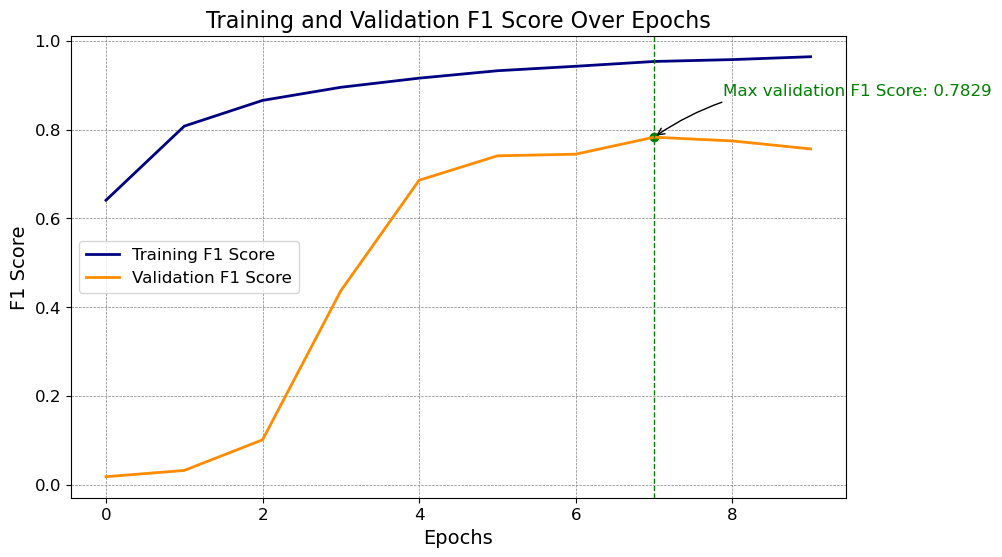

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(history_df['f1_score'], label='Training F1 Score', color='navy', linewidth=2)
plt.plot(history_df['val_f1_score'], label='Validation F1 Score', color='darkorange', linewidth=2)
plt.title('Training and Validation F1 Score Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.legend(fontsize=12)
max_val_f1_idx = history_df['val_f1_score'].idxmax() 
max_val_f1 = history_df['val_f1_score'].max()
plt.axvline(x=max_val_f1_idx, linestyle='--', color='green', linewidth=1, label='Highest Validation F1 Score')
plt.scatter(max_val_f1_idx, max_val_f1, color='green')  # Точка максимального значения F1 Score

plt.annotate(f'Max validation F1 Score: {max_val_f1:.4f}',
             xy=(max_val_f1_idx, max_val_f1),
             xycoords='data',
             xytext=(50, 30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
             fontsize=12,
             color='green')

plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


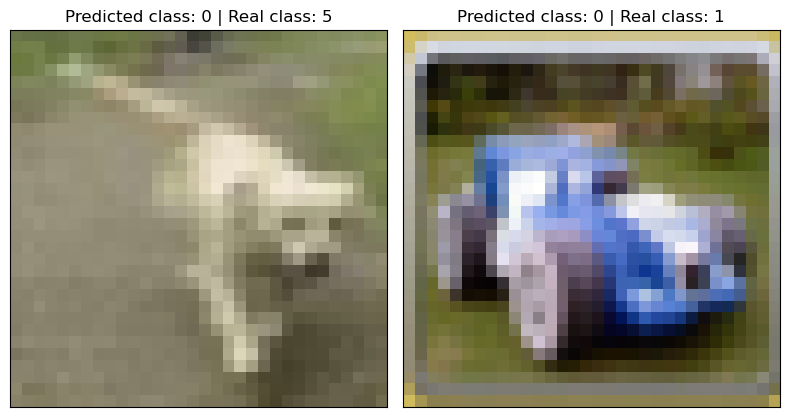

In [142]:
preds = model_3.predict(X_test)
preds = np.argmax(preds, axis=1)
y_test_idx = np.argmax(y_test, axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))

axes_flat = axes.flatten()

for i, ax in enumerate(axes_flat):
    ax.imshow(validation_images_normalized[i])

    predicted_class = np.argmax(preds[i])
    real_class = y_valid_converted[i]
    
    ax.set_title(f'Predicted class: {predicted_class} | Real class: {real_class}')
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [127]:
model_2.save('Models/model_2.keras')